# Retos de MongoDB 2

## Reto 1
* Suponer que se quiere modelar los datos correspondientes a un usuario de la aplicación.
* Las colecciones que podríamos tener serian:

    * **User:**
        - login									    
        - Password								
        - name  									
        - surname  
        - dateOfBirth  
        - Comments  
        - rol  
        - address  
        - phone  
        - email  
    
     * **Photo:**   
         - userName  
         - title  
         - description
         
         
* Crear una BBDD que contenga 2 colecciones (users, photos) siguiendo el esquema previo.
* Utilizar PyMongo para insertar, borrar, buscar y actualizar datos de las dos colecciones.
* Comprobar que todo funciona correctamente con Mongo Compass


In [1]:
import pymongo
import datetime
import dateutil
import pandas as pd

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client.codenotch

In [14]:
collection = db.users

#Insertamos en users

doc1 = {"login": 1, "Password": "3420KJANKN", "name": "Elena","surname": "Diaz", "dateOfBirth": 20230504, "Comments": "Atletica", 
        "rol": True, "address": "Calle Alamo 2", "phone": 693132, "email": "elenadiaz@gmail.com"}

doc2 = {"login": 0, "Password": "dfsio", "name": "Xiu","surname": "He", "dateOfBirth": 20130504, "Comments": "Programador", 
        "rol": True, "address": "Avenida Luz 42", "phone": 689444, "email": "hexiu@gmail.com"}
doc3 = {"login": 1, "Password": "xxxxxx", "name": "John","surname": "Winfrey", "dateOfBirth": 20030504, "Comments": "Pintor", 
        "rol": False, "address": "Calle Alamo 5", "phone": 648749, "email": "john@gmail.com"}
doc4 = {"login": 0, "Password": "password", "name": "Lucas","surname": "Marquez", "dateOfBirth": 19930504, "Comments": "Serio", 
        "rol": False, "address": "Calle Alamo 4", "phone": 624739, "email": "alamo4@gmail.com"}
doc5 = {"login": 1, "Password": "contraseña", "name": "Javier","surname": "Diaz", "dateOfBirth": 19870504, "Comments": "Periodista", 
        "rol": True, "address": "Calle Oscura 678", "phone": 6019347, "email": "javier@gmail.com"}
doc6 = {"login": 0, "Password": "jIUnUJL8", "name": "Raquel","surname": "Nuñez", "dateOfBirth": 19480504, "Comments": "Bromista", 
        "rol": False, "address": "Paseo Nuevo 1", "phone": 601018, "email": "ranu@gmail.com"}

ids = collection.insert_many([doc2,doc3,doc4,doc5,doc6]).inserted_ids
print(ids)



[ObjectId('64cb818a05abda375eaa1854'), ObjectId('64cb818a05abda375eaa1855'), ObjectId('64cb818a05abda375eaa1856'), ObjectId('64cb818a05abda375eaa1857'), ObjectId('64cb818a05abda375eaa1858')]


In [15]:
#Insertamos en photo

collection = db.photo

doc1 = {"userName": "Xiu", "title": "Playa", "description": "playa paradisiaca"}
doc2 = {"userName": "Lucas", "title": "montaña", "description": "ultima montaña en escalar"}
doc3 = {"userName": "Raquel", "title": "suiza", "description": "chocolate antes de esquiar"}
doc4 = {"userName": "Elena", "title": "alicante", "description": "disfrutando de las vacaciones"}
doc5 = {"userName": "Lucas", "title": "navidades", "description": "fiestas en familia"}

ids = collection.insert_many([doc1,doc2,doc3,doc4,doc5]).inserted_ids
print(ids)


[ObjectId('64cb821c05abda375eaa1859'), ObjectId('64cb821c05abda375eaa185a'), ObjectId('64cb821c05abda375eaa185b'), ObjectId('64cb821c05abda375eaa185c'), ObjectId('64cb821c05abda375eaa185d')]


In [16]:
collection = db.users

#Borramos en users - many

data = collection.delete_many({"login":0})

print(data.raw_result)

{'n': 3, 'ok': 1.0}


In [17]:
collection = db.photo

#Borramos en photos - one

from bson.objectid import ObjectId

data = collection.delete_one({"userName": "Xiu"})

print(data.raw_result)

{'n': 1, 'ok': 1.0}


In [20]:
collection = db.users

import dateutil

#Actualizamos en users - ones

data = collection.update_one({"dateOfBirth": 20230504},{"$set" : {"dateOfBirth": dateutil.parser.parse("2023-05-04 00:00:00.000Z")}})
data1 = collection.update_one({"dateOfBirth": 20030504},{"$set" : {"dateOfBirth": dateutil.parser.parse("2003-05-04 00:00:00.000Z")}})
data2 = collection.update_one({"dateOfBirth": 19870504},{"$set" : {"dateOfBirth": dateutil.parser.parse("1987-05-04 00:00:00.000Z")}})

print(data.modified_count, data.raw_result)
print(data1.modified_count, data1.raw_result)
print(data2.modified_count, data2.raw_result)

0 {'n': 0, 'nModified': 0, 'ok': 1.0, 'updatedExisting': False}
1 {'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}
1 {'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}


In [21]:
#Actualizamos en users - many

data = collection.update_many({"surname": "Diaz"},{"$set" : {"surname": "Diaz Vega"}})

print(data.modified_count, data.raw_result)


2 {'n': 2, 'nModified': 2, 'ok': 1.0, 'updatedExisting': True}


In [24]:
#Consulta condicionada, ordenada y con proyeccion

cursor = collection.find({"phone": {"$gt":690000}}, {"_id":0, "name": 1, "surname": 1}).sort("name",1)

for data in cursor:
    print(data)

{'name': 'Elena', 'surname': 'Diaz Vega'}
{'name': 'Javier', 'surname': 'Diaz Vega'}


In [27]:
#Consulta Array condicionada y con proyeccion
collection = db.photo

cursor = collection.find({"userName" : {"$in":["Raquel", "Elena"]}}, {"_id":0, "userName": 1, "title": 1})

for data in cursor:
    print(data)

{'userName': 'Raquel', 'title': 'suiza'}
{'userName': 'Elena', 'title': 'alicante'}


In [28]:
#Consulta y actualizacion: Combinado

data = collection.find_one_and_update({"title":"navidades"},{"$set" : {"title":"fiestas navideñas"}})

print(data)


{'_id': ObjectId('64cb821c05abda375eaa185d'), 'userName': 'Lucas', 'title': 'navidades', 'description': 'fiestas en familia'}


## Reto 2
* Tomando como base el reto anterior implementar las siguientes FUNCIONES (def) y comprobar su correcto funcionamiento utilizando PyMongo:

    * **Subida de fotos**:
      Dado un usuario, url de foto, titulo y descripción se debe guardar en la colección ‘photos’.
    * **Obtener fotos**:
        Dado un usuario obtener todas sus fotos.

In [47]:
def subida_fotos():
    collection = db.photo
    x = str(input("Nombre de usuario: "))
    y = str(input("Titulo: "))
    z = str(input("Descripcion: "))
    doc1 = {"userName": x, "title": y, "description": z}
    doc1Id = collection.insert_one(doc1).inserted_id

In [48]:
subida_fotos()

Nombre de usuario: Javier
Titulo: Cena con compañeros
Descripcion: cena despues de un duro dia de trabajo


In [50]:
def obtener_fotos():
    collection = db.photo
    x = str(input("Nombre de usuario: "))
    cursor = collection.find({"userName": {"$eq":x}}, {"_id":0, "userName": 1, "title": 1, "description": 1})
    for data in cursor:
        print(data)
        
obtener_fotos()

Nombre de usuario: Lucas
{'userName': 'Lucas', 'title': 'montaña', 'description': 'ultima montaña en escalar'}
{'userName': 'Lucas', 'title': 'fiestas navideñas', 'description': 'fiestas en familia'}


   **Modificar fotos**:
        Dado el titulo de una foto y una descripción modificar su descripción.
        
        

In [4]:
def modificar_fotos():
    collection = db.photo
    x = str(input("Titulo: "))
    y = str(input("Modifica la descripcion: "))
    cursor = collection.find_one_and_upduserNameate({"title":x},{"$set" : {"description":y}})
    print(cursor)
        
modificar_fotos()

Titulo: suiza
Modifica la descripcion: recuerdos de unas vacaciones inolvidables
{'_id': ObjectId('64cb821c05abda375eaa185b'), 'userName': 'Raquel', 'title': 'suiza', 'description': 'recuerdos de unas vacaciones inolvidables'}


   **Eliminar Foto**:
        Dado un usuario y un titulo de foto eliminar su foto.

In [5]:
def eliminar_fotos():
    collection = db.photo
    x = str(input("Nombre de usuario: "))
    y = str(input("Titulo: "))
    cursor = collection.find_one_and_delete({"$and":[{"userName": {"$eq": x}}, {"title":{"$eq": y}}]})
    print(cursor)
        
eliminar_fotos()

Nombre de usuario: Lucas
Titulo: montaña
{'_id': ObjectId('64cb821c05abda375eaa185a'), 'userName': 'Lucas', 'title': 'montaña', 'description': 'ultima montaña en escalar'}


   **Eliminar todas las Fotos**:
        Dado un usuario eliminar todas sus fotos.

In [6]:
def eliminar_fotos():
    collection = db.photo
    x = str(input("Nombre de usuario: "))
    cursor = collection.delete_many({"userName": x})
    print(cursor)
        
eliminar_fotos()

Nombre de usuario: Raquel


## Reto 3: Escenario de Trabajo
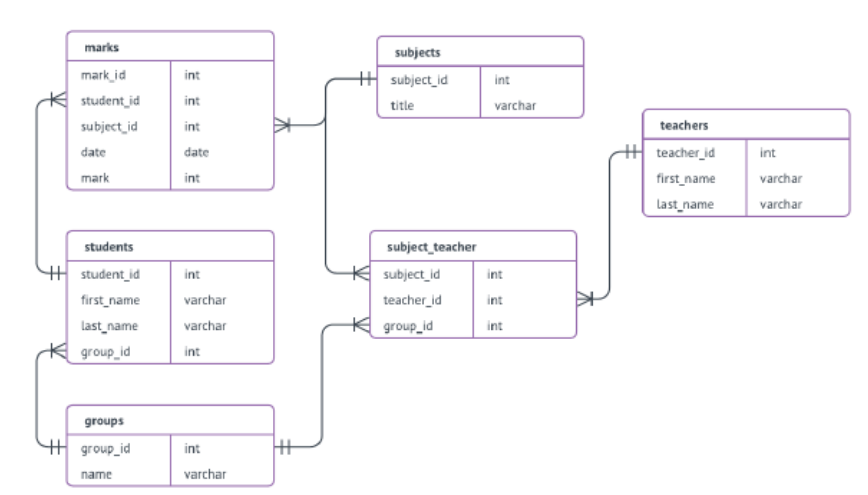




## Reto 3: Escenario de Trabajo con MongoDB
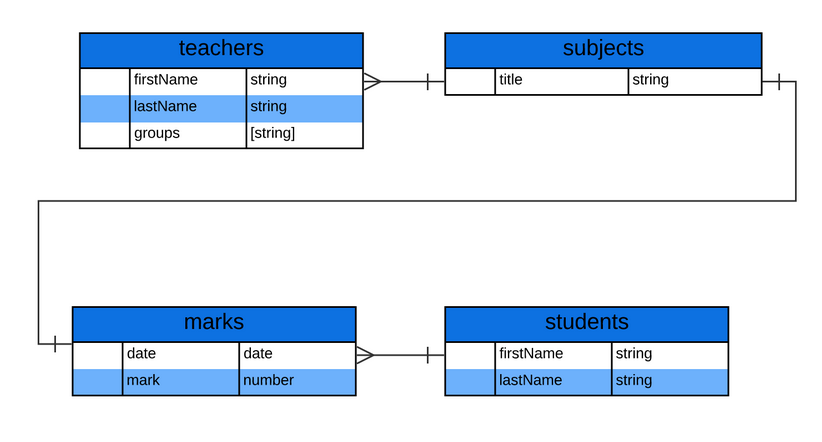

* Implementar el escenario de trabajo usando Mongo Compass (solo es necesario crear la colección de estudiantes).

* Insertar 4 documentos en la nueva base de datos utilizando pymongo.



In [97]:
#Implementamos la coleccion

import pymongo
import datetime
import dateutil
import pandas as pd

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client.codenotch

collection = db.estudiantes

In [98]:

#teachers: 
teacher_a = {"firstname": "Juan", "lastname": "Lopez", "groups": "2B"}
teacher_b = {"firstname": "Mariana", "lastname": "Ximenez", "groups": "4E"}
teacher_c = {"firstname": "Francisco", "lastname": "Lopez", "groups": "5T"}
teacher_d = {"firstname": "Diego", "lastname": "Perez", "groups": "1W"}
#subjects:
subject_a = {"title": "Saxofon", "teachers": [teacher_a, teacher_c]}
subject_b = {"title": "Geografia", "teachers": [teacher_a, teacher_d]}
subject_c = {"title": "Natacion", "teachers": [teacher_c, teacher_b]}
subject_d = {"title": "Nutricion", "teachers": [teacher_d, teacher_a]}
#marks:
mark_a = {"date": dateutil.parser.parse("2013-12-12 00:00:00.000Z"), "mark": 4, "subject": subject_a}
mark_b = {"date": dateutil.parser.parse("2021-10-08 00:00:00.000Z"), "mark": 8, "subject": subject_d}
mark_c = {"date": dateutil.parser.parse("2023-02-09 00:00:00.000Z"), "mark": 1, "subject": subject_b}
mark_d = {"date": dateutil.parser.parse("2022-05-04 00:00:00.000Z"), "mark": 5, "subject": subject_a}
mark_e = {"date": dateutil.parser.parse("2023-09-01 00:00:00.000Z"), "mark": 9, "subject": subject_d}
#students:
a = {"_id": 1, "firstname" : "Xiu", "lastname" : "Ha", "marks" : [mark_d, mark_c]}
b = {"_id": 2, "firstname" : "Elena", "lastname" : "Lopez", "marks" : [mark_a, mark_e]}
c = {"_id": 3, "firstname" : "Pablo", "lastname" : "Perez", "marks" : [mark_d, mark_b]}
d = {"_id": 4, "firstname" : "Monica", "lastname" : "Lopez", "marks" : [mark_b, mark_e]}

In [99]:
#Insertamos los documentos

ids = collection.insert_many([a,b,c,d]).inserted_ids

* Mostrar las siguientes consultas utilizando pymongo:
	- Todas las notas de  un alumno.
	- Todos las asignaturas de un alumno.
	- Todos los profesores de un alumno.

In [121]:
cursor = collection.find({"firstname": {"$eq": "Pablo"}})
for p in cursor:
    print(p)

{'_id': 3, 'firstname': 'Pablo', 'lastname': 'Perez', 'marks': [{'date': datetime.datetime(2022, 5, 4, 0, 0), 'mark': 5, 'subject': {'title': 'Saxofon', 'teachers': [{'firstname': 'Juan', 'lastname': 'Lopez', 'groups': '2B'}, {'firstname': 'Francisco', 'lastname': 'Lopez', 'groups': '5T'}]}}, {'date': datetime.datetime(2021, 10, 8, 0, 0), 'mark': 8, 'subject': {'title': 'Nutricion', 'teachers': [{'firstname': 'Diego', 'lastname': 'Perez', 'groups': '1W'}, {'firstname': 'Juan', 'lastname': 'Lopez', 'groups': '2B'}]}}]}


In [122]:
#Todas las notas de un alumno.

for m in cursor['marks']:
    print(m)


InvalidOperation: cannot set options after executing query

In [110]:
#Notas de un alumno

for j in cursor[0]["marks"]:
    lista_notas=[]
    lista_notas.append(j['mark'])
    for nota in lista_notas:
        print (nota)        
        

5
8


In [115]:
#Todos las asignaturas de un alumno.

for j in cursor[0]["marks"]:
    lista_asignaturas=[]
    lista_asignaturas.append(j['subject']['title'])
    for asignatura in lista_asignaturas:
        print (asignatura)

Saxofon
Nutricion


In [119]:
#Todos los profesores de un alumno.

for j in cursor[0]["marks"]:
    lista_teachers = j['subject']['teachers']
    for teacher in lista_teachers:
        print (teacher['firstname']+' '+teacher['lastname'])

Juan Lopez
Francisco Lopez
Diego Perez
Juan Lopez


## Reto 4
* Crea una BD de MongoDB nueva donde cargues información de alojamientos y barrios de Madrid de AirBnB. La información está disponible [aquí](http://insideairbnb.com/get-the-data.html). 

* Los ficheros a cargar son listings.csv y neighbourhoods.csv.

* Una vez cargados, prueba a hacer algunas consultas que sean de tu interés.

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client.airbnbmadrid
collection = db.alojamientos

alojamientos = pd.read_csv('listings.csv')

alojamientos_dict = alojamientos.to_dict("records")

ids = collection.insert_many(alojamientos_dict).inserted_ids

In [ ]:
for i,j in enumerate(cursor[0]["marks"][0]["subjects"]):
    for n in j["subjects"][0]['teachers']:
        print(n['firstname'])

In [5]:
barrios = pd.read_csv('neighbourhoods.csv')

collection = db.barrios

barrios_dict = barrios.to_dict("records")

ids = collection.insert_many(barrios_dict).inserted_ids
